In [170]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/datasets
/kaggle/input/datasets/yusufdelikkaya
/kaggle/input/datasets/yusufdelikkaya/udemy-online-education-courses
/kaggle/input/datasets/yusufdelikkaya/udemy-online-education-courses/udemy_online_education_courses_dataset.csv


## Data Loading

In [171]:
df = pd.read_csv("/kaggle/input/datasets/yusufdelikkaya/udemy-online-education-courses/udemy_online_education_courses_dataset.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


## Data Cleaning

In [172]:
# Viewing the structure of the data
df.shape

(3678, 12)

In [173]:
# Viewing the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [174]:
# First five entries of data
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [175]:
# Last five entries of the data
df.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [176]:
# Are there any missing values?
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [177]:
# Are there any duplicate values?
df.duplicated().sum()

np.int64(6)

In [178]:
# Are there any invalid data types?
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [179]:
# Converting the 'published_timestamp' column to datetime format
df["published_timestamp"] = pd.to_datetime(df["published_timestamp"])

In [180]:
df['Year'] = df['published_timestamp'].dt.year
df['Month'] = df['published_timestamp'].dt.month
df['Revenue_Est'] = df['price'] * df['num_subscribers']

In [181]:
# Standardizing the column names
df.columns = df.columns.str.strip().str.title()

In [182]:
df.columns

Index(['Course_Id', 'Course_Title', 'Url', 'Is_Paid', 'Price',
       'Num_Subscribers', 'Num_Reviews', 'Num_Lectures', 'Level',
       'Content_Duration', 'Published_Timestamp', 'Subject', 'Year', 'Month',
       'Revenue_Est'],
      dtype='object')

In [183]:
# Statistical summary of numerical columns
df[['Price','Num_Subscribers','Num_Reviews','Content_Duration']].describe()

,Price,Num_Subscribers,Num_Reviews,Content_Duration
count,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,4.094517
std,61.005755,9504.117010,935.452044,6.053840
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,1.000000
50%,45.000000,911.500000,18.000000,2.000000
75%,95.000000,2546.000000,67.000000,4.500000
max,200.000000,268923.000000,27445.000000,78.500000


In [184]:
# Mapping the 'Is_Paid' column to Free and Paid
df['Is_Paid'] = df['Is_Paid'].map({True: 'Paid', False: 'Free'})

In [185]:
# Checking the categorical columns
df['Level'].value_counts()

Level
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [186]:
df["Subject"].value_counts()

Subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

In [187]:
# The final shape of the cleaned data
df.shape

(3678, 15)

In [188]:
df.head()

,Course_Id,Course_Title,Url,Is_Paid,Price,Num_Subscribers,Num_Reviews,Num_Lectures,Level,Content_Duration,Published_Timestamp,Subject,Year,Month,Revenue_Est
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017,1,429400
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017,3,209400
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,Paid,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016,12,97830
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,Paid,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017,5,232845
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,Paid,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016,12,255200


## Data Analysis and Visualization

In [189]:
# Outlier Detection in numerical columns
num_df = df.select_dtypes(include=['int64','float64'])
num_df = num_df.drop(columns=['Course_Id'])
num_df.columns

Index(['Price', 'Num_Subscribers', 'Num_Reviews', 'Num_Lectures',
       'Content_Duration', 'Revenue_Est'],
      dtype='object')

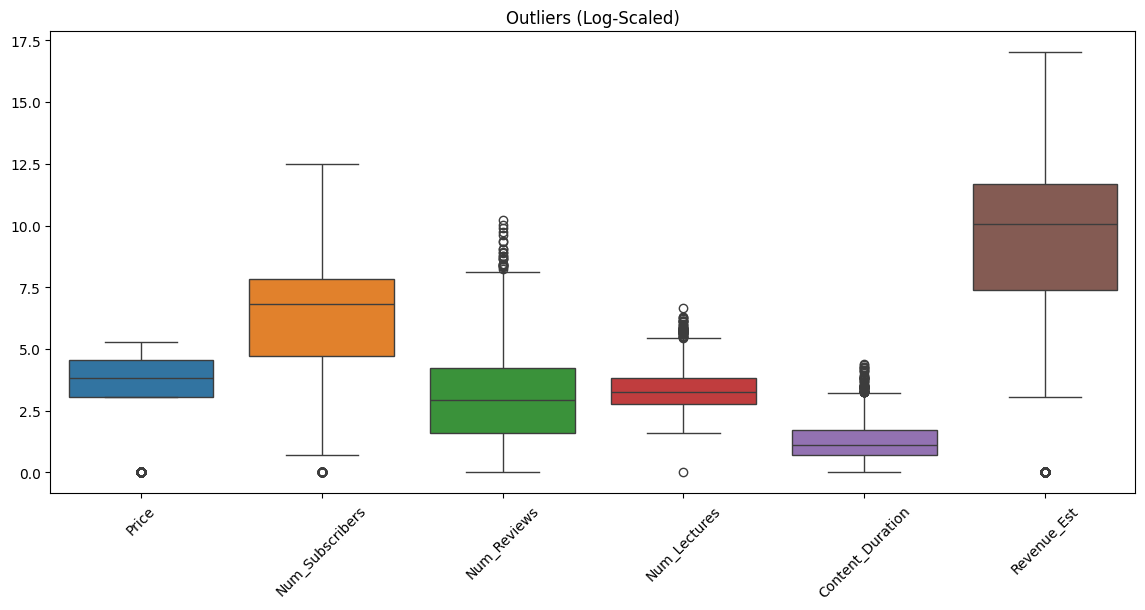

In [190]:
plt.figure(figsize=(14,6))
sns.boxplot(data=np.log1p(num_df))
plt.xticks(rotation=45)
plt.title('Outliers (Log-Scaled)')
plt.show()

#Outlier analysis revealed strong right-skewed distributions in subscriber count, reviews,
#content duration, and revenue, consistent with power-law behavior commonly observed in digital platforms.
#These extreme values represent high-performing courses rather than data anomalies and were retained 
#to preserve business insights.

In [191]:
# Which subject has highest average price?
df.groupby('Subject')['Price'].mean().sort_values(ascending=False)

Subject
Web Development        77.033333
Business Finance       68.552301
Graphic Design         57.827529
Musical Instruments    49.558824
Name: Price, dtype: float64

In [192]:
# Which subject has most subscribers?
sub_count = df.groupby('Subject')['Num_Subscribers'].sum().sort_values(ascending=False)
sub_count

Subject
Web Development        7980572
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Name: Num_Subscribers, dtype: int64

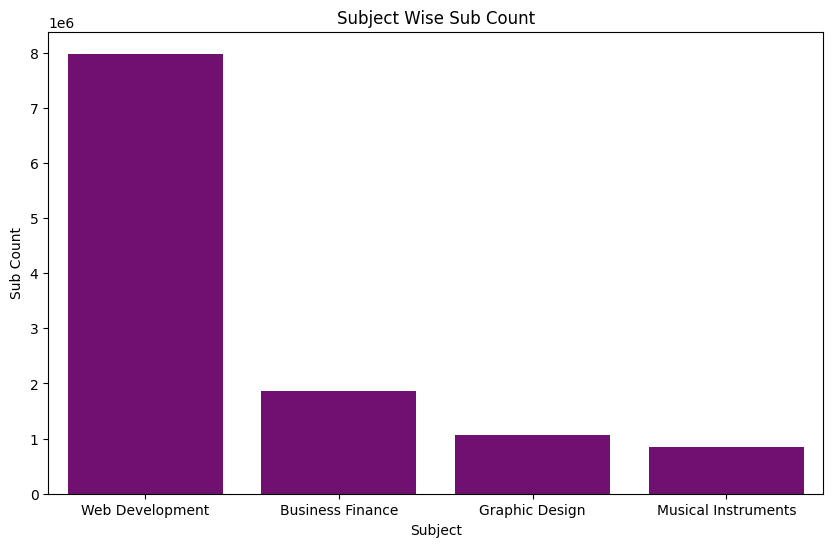

In [193]:
# Bar plot showing subject wise sub count
plt.figure(figsize= (10, 6))
sns.barplot(x= sub_count.index, y= sub_count.values, color= 'purple')
plt.title("Subject Wise Sub Count")
plt.xlabel("Subject")
plt.ylabel("Sub Count")
plt.show()

In [194]:
# What is the average course duration?
df['Content_Duration'].mean().round()

np.float64(4.0)

In [195]:
# How many paid and free courses are present in the data?
df["Is_Paid"].value_counts()

Is_Paid
Paid    3368
Free     310
Name: count, dtype: int64

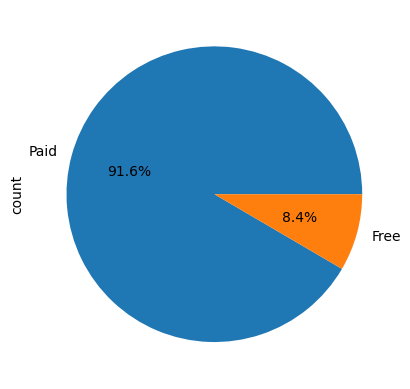

In [196]:
# Pie chart showing percentage of free and paid courses
df['Is_Paid'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [197]:
# Do paid courses have more subscribers than free courses?
df.groupby("Is_Paid")["Num_Subscribers"].mean()

Is_Paid
Free    11533.951613
Paid     2429.808492
Name: Num_Subscribers, dtype: float64

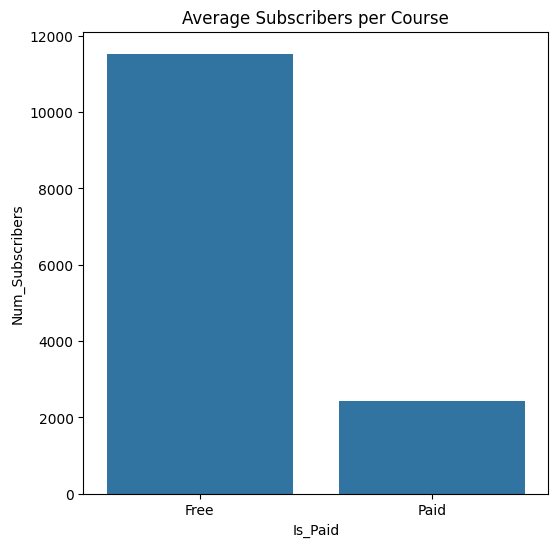

In [198]:
plt.figure(figsize= (6, 6))
sns.barplot(df.groupby("Is_Paid")["Num_Subscribers"].mean())
plt.title("Average Subscribers per Course")
plt.show()

In [199]:
# Top 10 most subscribed courses
top_10_courses = df[['Course_Title','Num_Subscribers']].sort_values(by='Num_Subscribers', ascending=False).head(10)
top_10_courses

,Course_Title,Num_Subscribers
2827,Learn HTML5 Programming From Scratch,268923
3032,Coding for Entrepreneurs Basic,161029
3230,The Web Developer Bootcamp,121584
2783,Build Your First Website in 1 Week with HTML5 ...,120291
3232,The Complete Web Developer Course 2.0,114512
1896,Free Beginner Electric Guitar Lessons,101154
2589,Web Design for Web Developers: Build Beautiful...,98867
2619,Learn Javascript & JQuery From Scratch,84897
3289,Practical PHP: Master the Basics and Code Dyna...,83737
3247,JavaScript: Understanding the Weird Parts,79612


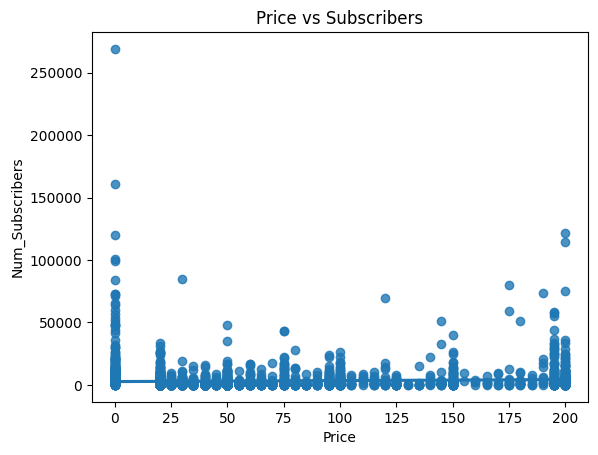

In [200]:
# How does pricing affect subscriber acquisition?
sns.regplot(x='Price', y='Num_Subscribers', data=df)
plt.title('Price vs Subscribers')
plt.show()

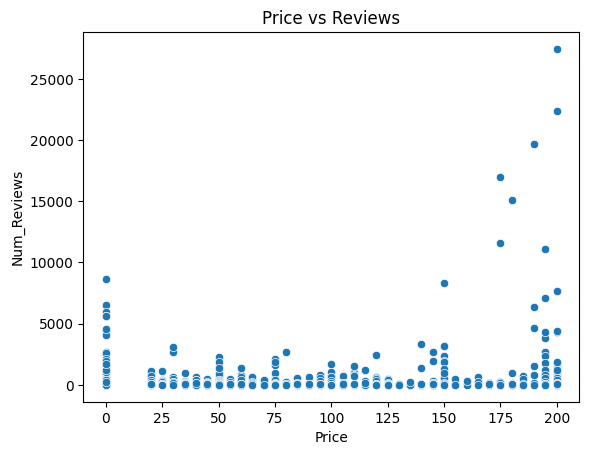

In [201]:
# Price vs Reviews
sns.scatterplot(x='Price', y='Num_Reviews', data=df)
plt.title('Price vs Reviews')
plt.show()

In [202]:
# What factors affect course success?
df[['Price', 'Num_Subscribers', 'Num_Reviews', 'Content_Duration']].corr()

,Price,Num_Subscribers,Num_Reviews,Content_Duration
Price,1.000000,0.050769,0.113696,0.293450
Num_Subscribers,0.050769,1.000000,0.649946,0.161839
Num_Reviews,0.113696,0.649946,1.000000,0.228889
Content_Duration,0.293450,0.161839,0.228889,1.000000


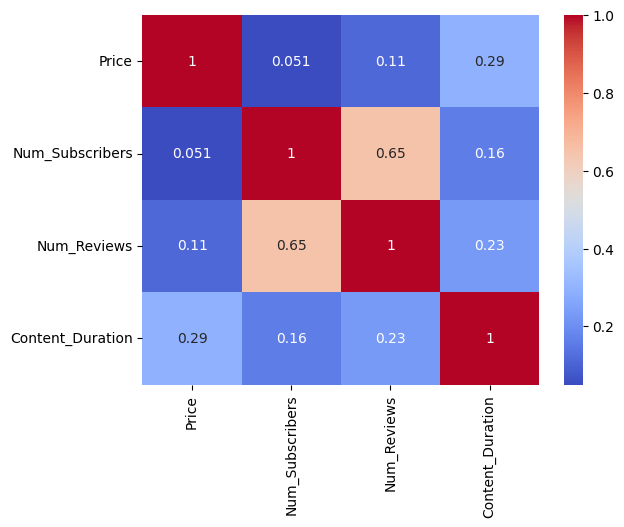

In [203]:
sns.heatmap(df[['Price', 'Num_Subscribers', 'Num_Reviews', 'Content_Duration']].corr(), annot=True, cmap='coolwarm')
plt.show()

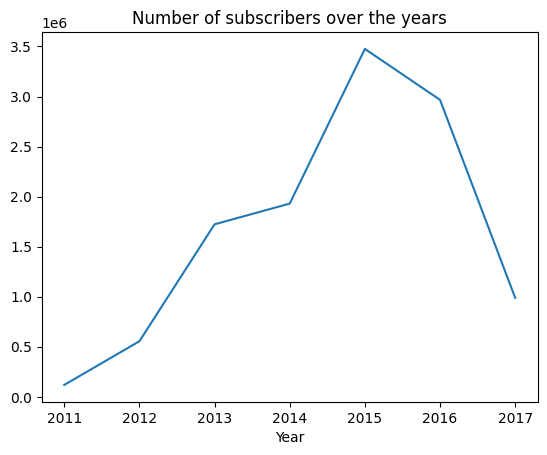

In [204]:
# Distribution of number of subscribers over the years
df.groupby('Year')['Num_Subscribers'].sum().plot()
plt.title("Number of subscribers over the years")
plt.show()

In [205]:
# Number of course launches per year
df["Year"].value_counts()

Year
2016    1206
2015    1014
2017     715
2014     491
2013     202
2012      45
2011       5
Name: count, dtype: int64

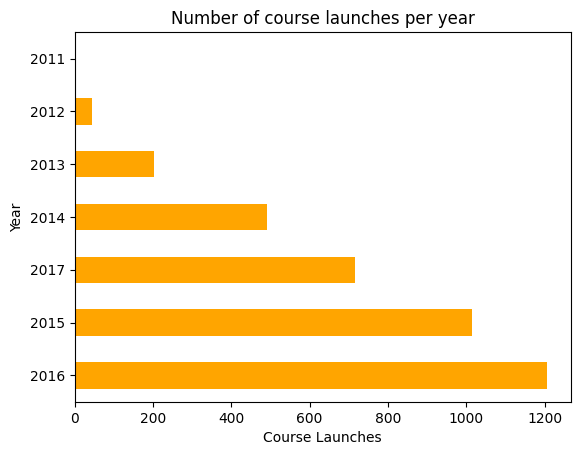

In [206]:
df["Year"].value_counts().plot(kind= 'barh', color= 'orange')
plt.title("Number of course launches per year")
plt.xlabel("Course Launches")
plt.ylabel("Year")
plt.show()

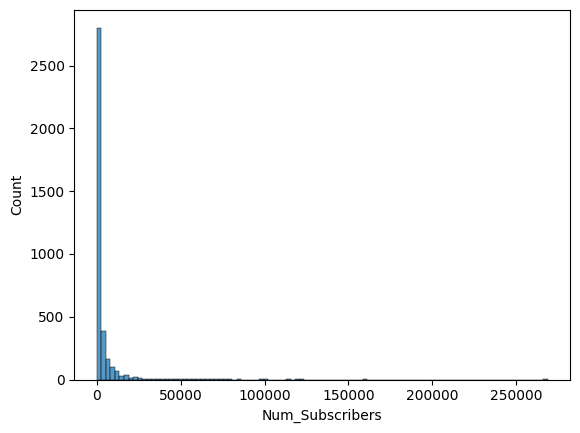

In [207]:
# Subscriber Distribution
sns.histplot(df['Num_Subscribers'], bins=100)
plt.show()

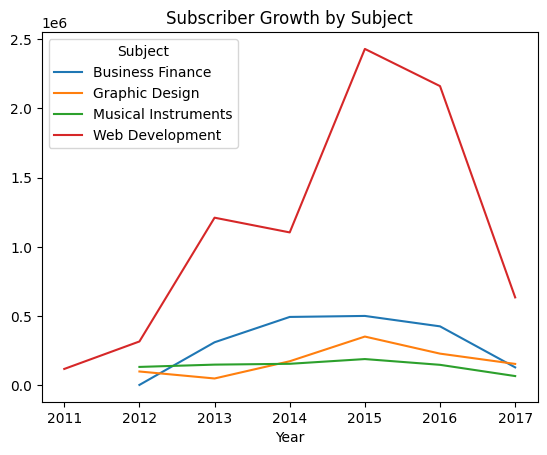

In [208]:
# Which subjects show the strongest growth trend?
df.groupby(['Year','Subject'])['Num_Subscribers'].sum().unstack().plot()
plt.title('Subscriber Growth by Subject')
plt.show()

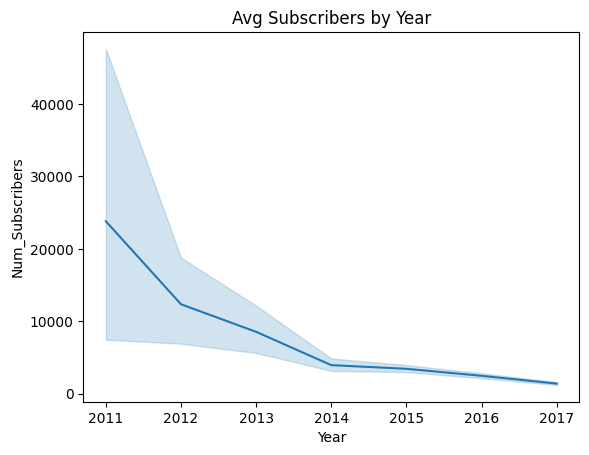

In [209]:
# Are newer courses outperforming older ones?
sns.lineplot(x= 'Year', y= 'Num_Subscribers', data= df, estimator= 'mean')
plt.title('Avg Subscribers by Year')
plt.show()

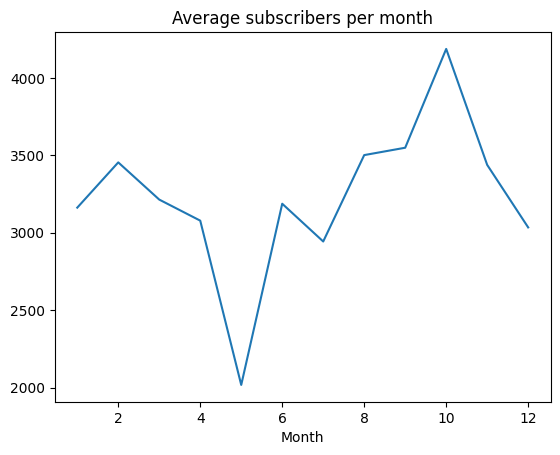

In [210]:
# Are certain months strategically better for launching a course?
df.groupby("Month")["Num_Subscribers"].mean().plot()
plt.title("Average subscribers per month")
plt.show()

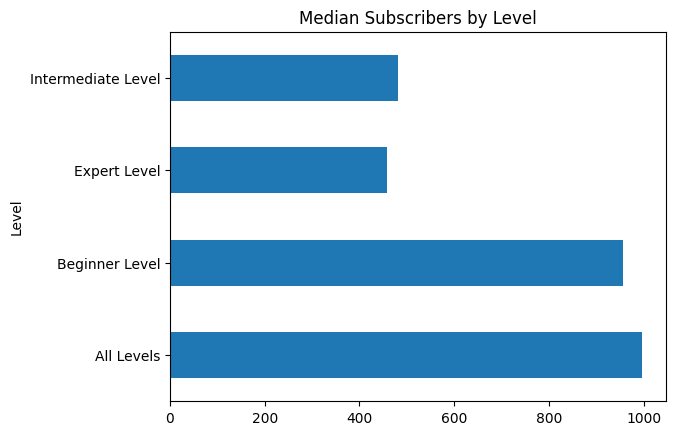

In [211]:
# Does professional level guarantee higher success?
df.groupby("Level")["Num_Subscribers"].median().plot(kind= 'barh')
plt.title('Median Subscribers by Level')
plt.show()

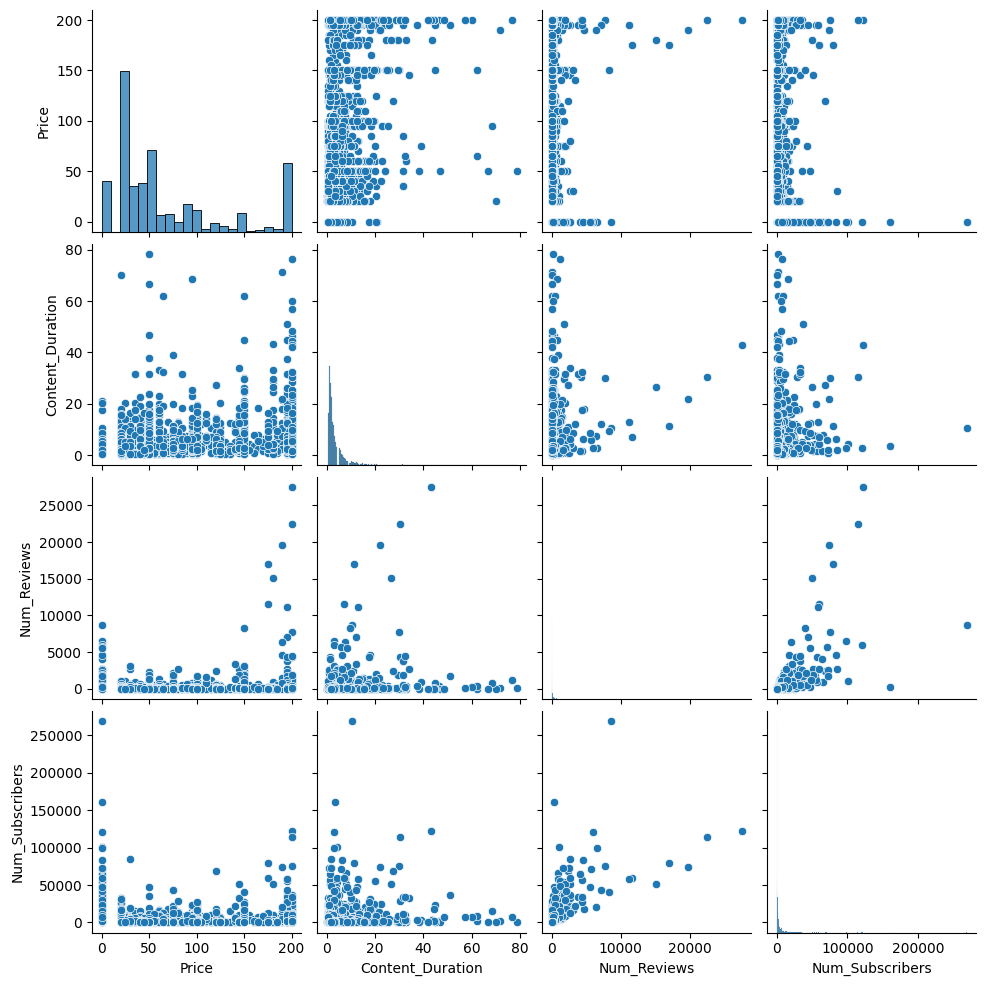

In [212]:
# Paiplot
sns.pairplot(df[['Price','Content_Duration','Num_Reviews','Num_Subscribers']])
plt.show()